In [1]:
# This program aims to accurately predict the emotional states of a subject while hearing murottal of Quran given their EEG readings using a recurrent neural network
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('EEGpuslitpen.csv')

In [3]:
data

,C3-A1,C4-A2,F3-A1,F4-A2,F7-A1,F8-A2,Fp1-A1,Fp2-A2,O1-A1,O2-A2,P3-A1,P4-A2,T3-A1,T4-A2,T5-A1,T6-A2,LABEL
0,14.764630,-2.752728,17.267109,-5.155108,-7.757687,-7.757687,10.860761,-5.155108,9.759670,7.657588,12.162051,-11.761654,-5.655604,-12.562448,5.455406,-11.060960,NORMAL
1,14.464332,-2.952926,17.267109,-4.854810,-8.158083,-7.257191,10.660563,-4.454414,9.959869,7.857786,12.362249,-11.761654,-6.056001,-11.361257,6.356298,-13.463340,NORMAL
2,14.264134,-4.254215,21.971771,-6.256199,-8.658579,-7.757687,10.560464,-4.154116,10.360266,7.957885,12.362249,-11.161059,-6.056001,-12.662547,7.357290,-13.163043,NORMAL
3,14.564431,-3.953918,21.771572,-7.457389,-8.758679,-7.157092,10.360266,-3.653620,10.660563,8.258183,12.362249,-10.460365,-6.556497,-12.962844,7.957885,-10.160067,NORMAL
4,14.464332,-3.953918,20.470283,-6.956893,-8.658579,-7.257191,10.059968,-2.152132,10.960861,8.458381,12.362249,-11.060960,-5.755703,-13.463340,8.458381,-10.160067,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-3.253223,22.672465,-15.965820,19.969787,9.058976,37.987640,12.962844,30.079805,-1.251240,18.067903,-81.430686,79.328603,-4.254215,5.155108,-6.556497,5.455406,MUROTTAL_SPIKE
15996,8.758679,0.950942,-16.166018,19.669490,8.258183,24.073854,12.162051,28.077821,-1.551537,16.566415,-76.225528,65.915312,-41.691310,5.755703,-15.665522,5.155108,MUROTTAL_SPIKE
15997,21.671473,0.650645,-27.977722,20.470283,8.158083,22.272068,12.362249,28.878614,-2.352331,16.366217,-76.025330,70.319677,-73.322652,7.357290,-14.964828,6.056001,MUROTTAL_SPIKE
15998,28.878614,4.254215,-23.973754,22.071870,10.260166,21.671473,14.164034,30.780499,-2.752728,15.365225,-75.324636,71.220569,-75.725032,8.858778,-12.862745,7.257191,MUROTTAL_SPIKE


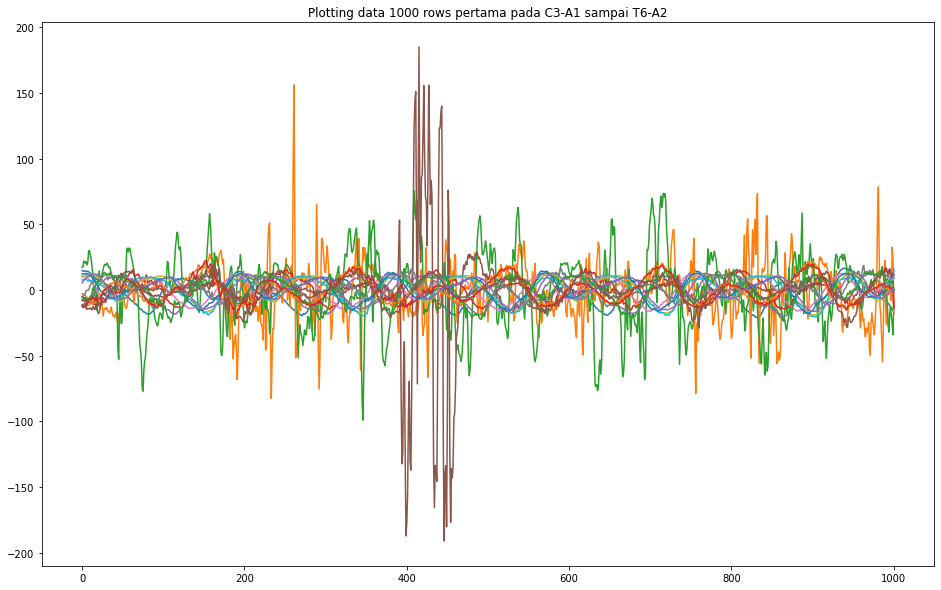

In [4]:
sample = data.loc[0:1000, 'C3-A1':'T6-A2']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Plotting data 1000 rows pertama pada C3-A1 sampai T6-A2')
plt.show()

In [5]:
data['LABEL'].value_counts()

SPIKE              4000
MUROTTAL_SPIKE     4000
MUROTTAL_NORMAL    4000
NORMAL             4000
Name: LABEL, dtype: int64

In [6]:
label_mapping = {'NORMAL': 0, 'SPIKE': 1, 'MUROTTAL_NORMAL': 2, 'MUROTTAL_SPIKE': 3}

In [7]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['LABEL'] = df['LABEL'].replace(label_mapping)
    
  y = df['LABEL'].copy()
  X = df.drop('LABEL', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [9]:
X_train

,C3-A1,C4-A2,F3-A1,F4-A2,F7-A1,F8-A2,Fp1-A1,Fp2-A2,O1-A1,O2-A2,P3-A1,P4-A2,T3-A1,T4-A2,T5-A1,T6-A2
6357,4.054017,-9.359274,-5.655604,22.272068,-19.569390,2.252232,-3.553521,-7.457389,2.252232,2.452430,7.056992,-3.353323,-7.157092,-12.562448,-6.256199,9.058976
3,14.564431,-3.953918,21.771572,-7.457389,-8.758679,-7.157092,10.360266,-3.653620,10.660563,8.258183,12.362249,-10.460365,-6.556497,-12.962844,7.957885,-10.160067
6404,3.953918,8.458381,-4.554513,3.753719,-1.551537,8.558480,-15.865721,25.875639,-1.151141,6.956893,-13.263142,22.672465,9.459373,13.263142,9.159075,-12.262150
12497,4.254215,15.465324,-5.455406,-1.551537,-8.958877,-1.451438,18.468299,-1.151141,3.453422,-1.451438,-76.625925,10.960861,6.056001,-16.466316,5.255207,3.153124
7741,0.350347,-7.257191,-6.056001,-9.058976,-0.550546,-6.056001,2.452430,-1.851835,-4.454414,1.651637,-5.355306,-3.553521,6.456397,-2.952926,4.654612,2.852827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12252,5.855802,10.560464,-6.256199,7.357290,-4.754711,10.059968,3.753719,7.257191,6.956893,0.650645,2.152132,0.050050,3.753719,1.951934,4.354314,9.359274
1346,-24.674449,-3.653620,-23.172961,10.260166,10.960861,4.954910,13.963836,-12.662547,13.863737,15.064927,4.554513,-5.055009,-8.458381,-5.055009,6.956893,-0.050050
11646,6.056001,2.452430,-3.253223,2.252232,5.755703,2.452430,6.356298,0.350347,-0.950942,2.152132,0.050050,4.254215,-2.952926,3.153124,-0.650645,5.155108
15725,19.869688,-43.192798,-7.257191,-15.365225,-2.952926,-0.850843,-18.568399,-14.664530,5.755703,14.564431,10.360266,-12.362249,15.665522,-16.466316,5.255207,-14.664530


In [10]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 16, 1)             0         
_________________________________________________________________
gru (GRU)                    (None, 16, 256)           198912    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 16388     
Total params: 215,300
Trainable params: 215,300
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.98):   
          print("\nTelah mencapai %2.2f%% akurasi, proses training dihentikan." %(0.98*100))   
          self.model.stop_training = True

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=32,
    epochs=50,
    callbacks=[myCallback()]
)

Epoch 1/50
245/245 [==============================] - 6s 21ms/step - loss: 1.1188 - accuracy: 0.5049 - val_loss: 0.5757 - val_accuracy: 0.7870
Epoch 2/50
245/245 [==============================] - 4s 17ms/step - loss: 0.4405 - accuracy: 0.8425 - val_loss: 0.2355 - val_accuracy: 0.9256
Epoch 3/50
245/245 [==============================] - 4s 17ms/step - loss: 0.1622 - accuracy: 0.9476 - val_loss: 0.0911 - val_accuracy: 0.9726
Epoch 4/50
245/245 [==============================] - 4s 18ms/step - loss: 0.0498 - accuracy: 0.9892 - val_loss: 0.0666 - val_accuracy: 0.9819

Telah mencapai 98.00% akurasi, proses training dihentikan.


In [13]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 97.354%


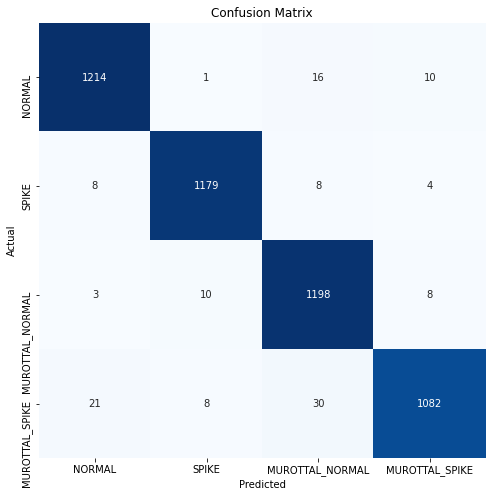

Classification Report:
----------------------
                  precision    recall  f1-score   support

         NORMAL       0.97      0.98      0.98      1241
          SPIKE       0.98      0.98      0.98      1199
MUROTTAL_NORMAL       0.96      0.98      0.97      1219
 MUROTTAL_SPIKE       0.98      0.95      0.96      1141

       accuracy                           0.97      4800
      macro avg       0.97      0.97      0.97      4800
   weighted avg       0.97      0.97      0.97      4800



In [14]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)